In [1]:
from os.path import realpath
import glob
import cv2
import os
import numpy as np
import pandas as pd
import join as join

In [2]:

path1 = "/home/luan/Desktop/feijao/Classificacao-main/imagens_cortadas/"
path2 = "/home/luan/Desktop/feijao/Classificacao-main/lote_de_imagens_PDI/"
path3 = "/home/luan/Desktop/feijao/Classificacao-main/projetoPDI"

In [3]:
externo = []
interno = []
imagens_externas = []
imagens_internas = []

In [4]:
print(os.listdir("./imagens_cortadas/"))

['LOTE_INTERNO_6_R2', 'LOTE_INTERNO_2_R2', 'LOTE_EXTERNO_5_R1', 'LOTE_INTERNO_3_R2', 'LOTE_EXTERNO_4_R1', 'LOTE_INTERNO_8_R2', 'LOTE_EXTERNO_10_R1', 'LOTE_INTERNO_9_R2', 'LOTE_EXTERNO_9_R1', 'LOTE_EXTERNO_8_R1', 'LOTE_INTERNO_4_R2', 'LOTE_INTERNO_10_R2', 'LOTE_EXTERNO_3_R1', 'LOTE_INTERNO_5_R2', 'LOTE_EXTERNO_2_R1', 'LOTE_INTERNO_1_R2']


In [5]:
#['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'INTERNO', '9', 'R', '1/LOTE', 'INTERNO', '9', 'R', '1', 'semente', '49.jpg']

In [6]:
lower = np.array([94, 20, 2])
upper = np.array([145, 255, 255])

for dic in glob.glob("/Users/alexandremac/Documents/UFC/PID/Classificacao//imagens_cortadas/*"):
    for img_path in glob.glob(os.path.join(dic, "*.jpg")):
        label = img_path.split("_")
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128, 128))       
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        mask = cv2.inRange(hsv, lower, upper)
        img = cv2.bitwise_and(img ,img, mask = mask)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.GaussianBlur(img,(3,3),0.1)
        if(label[5] == 'EXTERNO'):
            imagens_externas.append(np.array(img).reshape(-1))
            externo.append([label[6],1, label[-1]])
        if(label[5] == 'INTERNO'):
            imagens_internas.append(np.array(img).reshape(-1))

            interno.append([label[6],2, label[-1]])



In [7]:
img

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [72, 61, 78],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [8]:
imagens_internas

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 0,  0,  0, ..., 59, 59, 87], dtype=uint8),
 array([ 83,  88, 114, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([38, 47, 78, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([  0,   0,   0, ...,  81,  78, 108], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([64, 53, 90, ...,  0,  0,  0], dtype=uint8),
 array([73, 58, 84, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([49, 37, 60, ..., 67, 62, 89], dtype=uint8),
 array([54, 52, 78, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([89, 72, 95, ...,  0,  0,  0], dtype=uint8),
 array([ 0,  0,  0, ..., 75, 76, 97], dtype=uint8),
 array([

In [9]:
img_interna = pd.DataFrame(imagens_internas)

In [21]:
image0 = img_interna.iloc[0].to_numpy()

In [25]:
image0 = image0.reshape(128,128,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


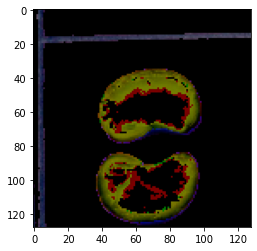

In [26]:
from matplotlib import pyplot as plt


plt.imshow(image0)

In [10]:
img_interna = img_interna/255

In [11]:
img_interna

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.196078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231373,0.231373,0.341176
3,0.325490,0.345098,0.447059,0.282353,0.258824,0.345098,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
448,0.364706,0.345098,0.388235,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [12]:
img_externas = pd.DataFrame(imagens_externas)

In [13]:
img_externas = img_externas/255

In [14]:
externo = pd.DataFrame(externo, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [15]:
interno = pd.DataFrame(interno, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [16]:
externo = pd.concat([externo, img_externas], axis=1)

In [17]:
interno = pd.concat([interno, img_interna], axis=1)

In [18]:
externo.to_csv('externo.csv', index_label=False)

In [19]:
interno.to_csv('interno.csv', index_label=False)